In [1]:
import sys
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy import nan as NA
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
%matplotlib inline
# %matplotlib qt5하면 창으로 뜸
import seaborn as sns
from pandas_ml import ConfusionMatrix
import datetime
from mpl_toolkits.mplot3d import Axes3D, axes3d
import operator
import mglearn
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC, SVC
# svm 과적합 과정 메소드
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [28]:
from matplotlib import font_manager

font_fname = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

print(font_family)

NanumGothic


In [30]:
font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

In [32]:
# 사용가능한 시스템의 TTF 폰트 목록
import matplotlib.font_manager as font_manager

font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

print('사용가능한 TTF 폰트 개수:', len(font_list))
font_list[:10] # 목록에서 처음 10 개만 보기

사용가능한 TTF 폰트 개수: 1041


['C:\\Windows\\Fonts\\FRABK.TTF',
 'C:\\Windows\\Fonts\\GILC____.TTF',
 'C:\\WINDOWS\\Fonts\\BOD_B.TTF',
 'C:\\WINDOWS\\Fonts\\corbell.ttf',
 'C:\\WINDOWS\\Fonts\\GILC____.TTF',
 'C:\\Windows\\Fonts\\NanumGothicBold.ttf',
 'C:\\WINDOWS\\Fonts\\HMKLP.TTF',
 'C:\\WINDOWS\\Fonts\\HYBDAL.TTF',
 'C:\\Windows\\Fonts\\HANYGO250.ttf',
 'C:\\Windows\\Fonts\\constanb.ttf']

- Module3

    -Part 01. 기계학습 개요
    
        05. 용어, 개념 이해하기 - confusion matrix 실습

In [2]:
data = {'y_Predicted' : [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0],
       'y_Actual' :     [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]}
df = pd.DataFrame(data, columns = ['y_Actual', 'y_Predicted'])
df

,y_Actual,y_Predicted
0,1,1
1,0,1
2,0,0
3,1,1
4,0,0
5,1,1
6,0,1
7,0,0
8,1,1
9,0,0


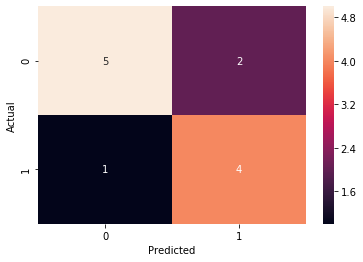

In [5]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'],
                               rownames = ["Actual"], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot = True)

In [15]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'],
                               rownames = ["Actual"], colnames = ['Predicted'], margins = True)

Confusion_Matrix = ConfusionMatrix(df['y_Actual'], df['y_Predicted'])
Confusion_Matrix.print_stats()

population: 12
P: 5
N: 7
PositiveTest: 6
NegativeTest: 6
TP: 4
TN: 5
FP: 2
FN: 1
TPR: 0.8
TNR: 0.7142857142857143
PPV: 0.6666666666666666
NPV: 0.8333333333333334
FPR: 0.2857142857142857
FDR: 0.3333333333333333
FNR: 0.2
ACC: 0.75
F1_score: 0.7272727272727273
MCC: 0.50709255283711
informedness: 0.5142857142857142
markedness: 0.5
prevalence: 0.4166666666666667
LRP: 2.8000000000000003
LRN: 0.28
DOR: 10.0
FOR: 0.16666666666666666


- Module3

    -Part 02. 기계학습 End to End
    
        04. 머신러닝에 필요한 수학의 기본

In [2]:
# 벡터 내적
b = np.array([1,3])
c = np.array([4,2])
print(b.dot(c))

10


In [4]:
# 벡터의 크기 p.492 -> |a| 로 표현
a = np.array([1,3])
print(np.linalg.norm(a))

3.1622776601683795


In [5]:
a = np.ones(1000)
b = np.arange(1, 1001)
print(a.dot(b))

500500.0


##### datetime으로 for문 시간 구하기 (중요!!!!!!!!!!!!!!!!!!)

In [14]:
a = np.ones(1000)
b = np.arange(1, 1001)
x = 0
ftime = datetime.datetime.now()
for i in range(len(a)):
    x += a[i] * b[i]
print(x)
etime = datetime.datetime.now()

500500.0


In [15]:
ftime = datetime.datetime.now()
print(a.dot(b))
etime = datetime.datetime.now()
print(etime-ftime)

500500.0
0:00:00.000997


##### 편미분 함수 그래프 p.500 ( 코드 해석하기 )

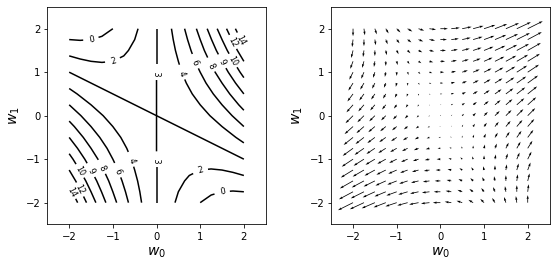

In [17]:
def f(w0, w1): # f의 정의
    return w0**2 + 2*w0*w1 +3
def df_dw0(w0, w1): # f의 w0에 관한 편미분
    return 2*w0 + 2*w1
def df_dw1(w0, w1): # f의 w1에 관한 편미분
    return 2*w0 + 0*w1

w_range = 2
dw = 0.25

w0 = np.arange(-w_range, w_range + dw, dw)
w1 = np.arange(-w_range, w_range + dw, dw)
wn = w0.shape[0]
ww0, ww1 = np.meshgrid(w0, w1) # (D)
ff = np.zeros((len(w0), len(w1)))
dff_dw0 = np.zeros((len(w0), len(w1)))
dff_dw1 = np.zeros((len(w0), len(w1)))
for i0 in range(wn):
    for i1 in range(wn):
        ff[i1, i0] = f(w0[i0], w1[i1])
        dff_dw0[i1, i0] = df_dw0(w0[i0], w1[i1])
        dff_dw1[i1, i0] = df_dw1(w0[i0], w1[i1])
plt.figure(figsize = (9, 4))
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1, 2, 1)
cont = plt.contour(ww0, ww1, ff, 10, colors = 'k') # f의 등고선 표시
cont.clabel(fmt = '%2.0f', fontsize = 8)
plt.xticks(range(-w_range, w_range + 1, 1))
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + .5)
plt.ylim(-w_range - .5, w_range + .5)
plt.xlabel('$w_0$', fontsize = 14) # $와 $ 사이는 수식 표현법 (w의 아랫첨자 0)
plt.ylabel('$w_1$', fontsize = 14) 

plt.subplot(1, 2, 2)
plt.quiver(ww0, ww1, dff_dw0, dff_dw1) # f의 경사 벡터 표시 (기울기)
plt.xlabel('$w_0$', fontsize = 14)
plt.ylabel('$w_1$', fontsize = 14)
plt.xticks(range(-w_range, w_range + 1, 1))
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + .5)
plt.ylim(-w_range - .5, w_range + .5)
plt.show()

# 좌측은 등고선 그래프 (높낮이를 등고선으로 표현)
# 우측은 벡터 그래프 (기울기가 심할수록 벡터의 길이도 길다)

##### p.502~504 수학식으로 마크다운에 적기 ( 다변수의 편미분 )

In [22]:
# 단위행렬 메소드
print(np.identity(3), "\n")

# 역행렬 메소드
A = np.array([[1,2], [3,4]])
invA = np.linalg.inv(A)
print(invA, "\n")

# 전치행렬
B = np.array([[1,2,3], [4,5,6]])
print(B, "\n\n", B.T)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[-2.   1. ]
 [ 1.5 -0.5]] 

[[1 2 3]
 [4 5 6]] 

 [[1 4]
 [2 5]
 [3 6]]


##### 지수함수 p.511
    - a를 밑으로 한 지수 함수
    - 지수의 정의 및 공식 참조
$$y = a^x$$

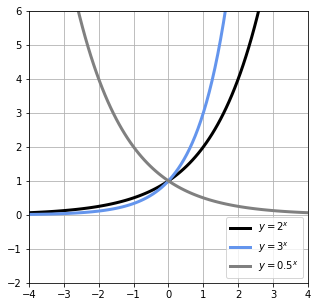

In [30]:
x = np.linspace(-4, 4, 100)
y = 2**x
y2 = 3**x
y3 = 0.5**x

plt.figure(figsize = (5,5))
plt.plot(x, y, 'black', linewidth = 3, label = '$y=2^x$')
plt.plot(x, y2, 'cornflowerblue', linewidth = 3, label = '$y=3^x$')
plt.plot(x, y3, 'gray', linewidth = 3, label = '$y=0.5^x$')
plt.ylim(-2, 6)
plt.xlim(-4, 4)
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()

##### 로그 함수 p.512
    - 지수 함수의 역함수
    - 로그의 정의 및 공식 참조
    - 오버플로 방지
$$y = log_ax$$

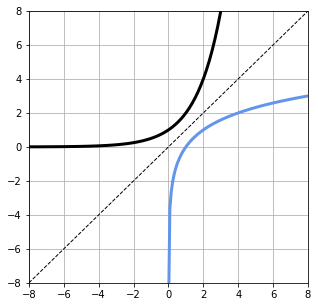

In [32]:
x = np.linspace(-8, 8, 100)
y = 2**x

x2 = np.linspace(0.001, 8, 100) # np.log(0)는 에러가 되므로 0은 포함하지 않음 ( 그래서 0.001 )
y2 = np.log(x2) / np.log(2) # 밑을 2로 한 log를 공식(7)로 계산
plt.figure(figsize = (5, 5))
plt.plot(x, y, 'black', linewidth = 3)
plt.plot(x2, y2, 'cornflowerblue', linewidth = 3)
plt.plot(x, x, 'black', linestyle = '--', linewidth = 1)
plt.ylim(-8, 8)
plt.xlim(-8, 8)
plt.grid(True)
plt.show()

# 검정선 : y = 2^x
# 파란선 : y = log2(x)

    - 로그를 취해도 최솟값을 취하는 값은 변하지 않는다.
$$argmin\,f(x) = argmin\,log{f(x)}$$
        - (밑에 그래프 참조)
        - min f(x)는 f(x)의 최솟값을 의미한다. min f(x) = 2
        - argmin f(x)는 f(x)가 최솟값을 취하는 x라는 뜻. argmin f(x) = 1 (밑에 그래프 참조)

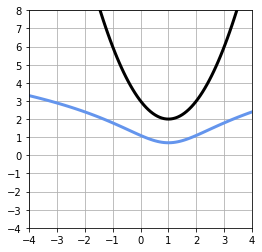

In [33]:
x = np.linspace(-4, 4, 100)
# linspace, logspace는 선형, 로그 구간으로 -4부터 4까지 100구간으로 나눈다는 뜻
y = (x - 1)**2 + 2
logy = np.log(y)

plt.figure(figsize = (4, 4))
plt.plot(x, y, 'black', linewidth = 3)
plt.plot(x, logy, 'cornflowerblue', linewidth = 3)
plt.yticks(range(-4, 9, 1))
plt.xticks(range(-4, 5, 1))
plt.ylim(-4, 8)
plt.xlim(-4, 4)
plt.grid(True)
plt.show()

##### 지수함수 미분 p.515~
$$y' = (a^x)' = a^xlog{a}$$

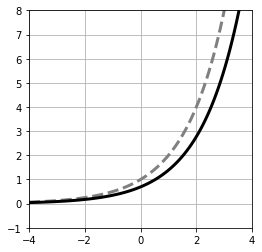

In [34]:
x = np.linspace(-4, 4, 100)
a = 2
y = a**x
dy = np.log(a) * y

plt.figure(figsize = (4, 4))
plt.plot(x, y, 'gray', linestyle = '--', linewidth = 3)
plt.plot(x, dy, color = 'black', linewidth = 3)
plt.ylim(-1, 8)
plt.xlim(-4, 4)
plt.grid(True)
plt.show()

##### 시그모이드 함수 p. 517
$$y=\frac{1}{1+e^-x} = \frac{1}{1+exp(-x)}$$
$$y'=y(1-y)$$

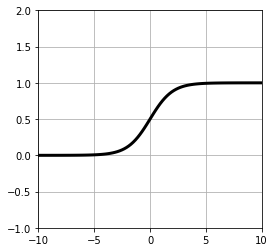

In [36]:
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize = (4, 4))
plt.plot(x, y, 'black', linewidth = 3)

plt.ylim(-1, 2)
plt.xlim(-10, 10)
plt.grid(True)
plt.show()

##### 소프트맥스 함수 p.518

    - ex) 3개의 수 x0 = 2, x1 = 1, x2 = -1가 있고,  이 수의 대소 관곌ㄹ 유지하면서,
          각각의 확률을 나타내는 y0, y1, y2로 변환
    - 확률이므로 0에서 1사이의 숫자. 또한 모두 더하면 1
    - 이런 경우에 사용되는 것이 softmax function
$$u = exp(x_0) + exp(x_1) + exp(x_2)$$

$$y_0 = \frac{exp(x_0)}{u}, y_1 = \frac{exp(x_1)}{u}, y_2 = \frac{exp(x_2)}{u}$$

In [38]:
def softmax(x0, x1, x2):
    u = np.exp(x0) + np.exp(x1) + np.exp(x2)
    return np.exp(x0) / u, np.exp(x1) / u, np.exp(x2) / u

# test
y = softmax(2, 1, -1)
print(np.round(y, 2))
print(np.sum(y))

[0.71 0.26 0.04]
1.0


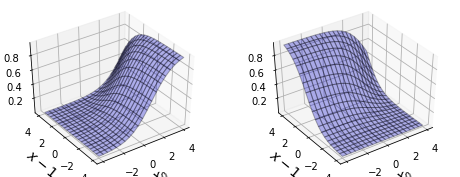

In [40]:
xn = 20
x0 = np.linspace(-4, 4, xn)
x1 = np.linspace(-4, 4, xn)

y = np.zeros((xn, xn, 3))
for i0 in range(xn):
    for i1 in range(xn):
        y[i1, i0, :] = softmax(x0[i0], x1[i1], 1)
        
xx0, xx1 = np.meshgrid(x0, x1)
plt.figure(figsize = (8, 3))
for i in range(2):
    ax = plt.subplot(1, 2, i + 1, projection = '3d')
    ax.plot_surface(xx0, xx1, y[:, :, i],
                   rstride = 1, cstride = 1, alpha = 0.3,
                   color = 'blue', edgecolor = 'black')
    ax.set_xlabel('$x_0$', fontsize = 14)
    ax.set_ylabel('$x-1$', fontsize = 14)
    ax.view_init(40, -125)
    
plt.show()

##### 가우스 함수 p.521

$$y\,=\,\alpha \,exp(-\frac{(x - \mu)^2}{\sigma^2})$$
    - x로 적분하여 1로 만들려면
$$\alpha \, = \, \frac{1}{(2\pi\sigma^2)^\frac{1}{2}}$$

-중요!!!!!!!!!!!!!!!!!!!!!
    - 데이터를 분류하는 분류 곡선의 높이와 넓이를 어떻게 지정할 것인가 -> 가우스 함수를 이용
    - (p.521 필기 참조)
    - a를 높이면 빨간선처럼 높아짐
    - sigma를 높이면 파란선처럼 넓어짐
    - 가우스함수로 정규분포식 유도하는 과정 학습하기!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

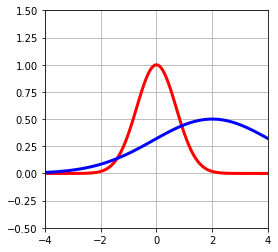

In [43]:
def gauss(mu, sigma, a):
    return a * np.exp(-(x - mu)**2 / sigma**2)

x = np.linspace(-4, 4, 100)
plt.figure(figsize = (4, 4))
plt.plot(x, gauss(0, 1, 1), 'red', linewidth = 3)
plt.plot(x, gauss(2, 3, 0.5), 'blue', linewidth = 3)
plt.ylim(-.5, 1.5)
plt.xlim(-4, 4)
plt.grid(True)
plt.show()

In [48]:
# 가우스 함수
def gauss(x, mu, sigma):
    N, D = x.shape
    c1 = 1 / (2 * np.pi)**(D/2)
    c2 = 1 / (np.linalg.det(sigma)**(1/2))
    inv_sigma = np.linalg.inv(sigma)
    c3 = x - mu
    c4 = np.dot(c3, inv_sigma)
    c5 = np.zeros(N)
    for d in range(D):
        c5 = c5 + c4[:, d] * c3[:, d]
    p = c1 * c2 * np.exp(-c5/2)
    return p
x = np.array([[1,2], [2,1], [3,4]])
mu = np.array([1,2])
sigma = np.array([[1,0], [0,1]])
print(gauss(x, mu, sigma))

[0.15915494 0.05854983 0.00291502]


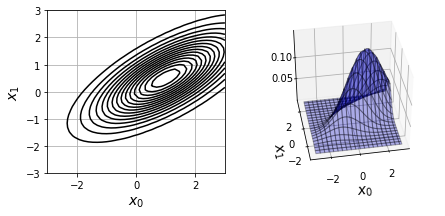

In [50]:
X_range0 = [-3, 3]
X_range1 = [-3, 3]

# 등고선 표시 -----------------------------------------
def show_contour_gauss(mu, sig):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
    f = gauss(x, mu, sig)
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, 15, colors = 'k')
    plt.grid(True)
    
# 3D 표시 -----------------------------------------------
def show3d_gauss(ax, mu, sig):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
    f = gauss(x, mu, sig)
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f,
                   rstride = 2, cstride = 2, alpha = 0.3,
                   color = 'blue', edgecolor = 'black')
    
# 메인 --------------------------------------------------
mu = np.array([1, 0.5])
sigma = np.array([[2,1], [1,1]])
Fig = plt.figure(1, figsize = (7,3))
Fig.add_subplot(1, 2, 1)
show_contour_gauss(mu, sigma)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$', fontsize = 14)
plt.ylabel('$x_1$', fontsize = 14)
Ax = Fig.add_subplot(1, 2, 2, projection = '3d')
show3d_gauss(Ax, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('$x_0$', fontsize = 14)
Ax.set_ylabel('$x_1$', fontsize = 14)
Ax.view_init(40, -100)
plt.show()

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module3

    -Part 03. 지도학습 기법 1
    
        01. k-NN (k-Nearest Neighbors)

- Euclidean distance

$d(p, q) = \sqrt{(q_1-p_1)^2+(q_2-p_2)^2}$

- Manhattan distance (원소 p, q가 벡터일 떄)

$d_1(p,q) = ||q-q||_1 = \sum_{i=1}^n |p_i - q_i|$

- Minkowski distance

$D(X, Y) = (\sum_{i = 1}^n |x_i - y_i|^p)^{\frac{1}{p}}$

- Cosine similarity, Mahalanobis distance, Hamming distance, ...

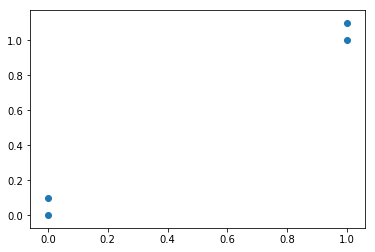

In [6]:
def createDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]]) # trainingSet
    labels = ['A', 'A', 'B', 'B'] # labels
    return group, labels

group, labels = createDataSet()

fig = plt.figure()
ax = fig.add_subplot(111) # (1,1)의 sub plot 행렬 중 1번째 사용한다는 뜻
ax.scatter(group[:,0], group[:,1]) # 첫번째 열이 X, 두번째 열이 Y 값 
plt.show()

In [7]:
group, labels

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]), ['A', 'A', 'B', 'B'])

k-최근접 이웃 알고리즘  p.532

In [3]:
def classify0(inX, dataSet, labels, k): # inX = 1024개(txt파일 1개) 데이터를 입력
    # 나중에 정규화한 데이터를 행별로 inX에 대입함
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet # inX를 (1934,1)로 만든후 dataSet을 빼줌 -> p-q 거리
    # 행별로 전체 사이즈에 맞춘 후 기존 데이터셋을 뺌 (거리정보 처리과정) -> 이게 거리정보가 됨
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis = 1) # 1934개의 sum값이 나옴
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort() # sort했을 떄 작은 값부터 인덱스를 반환 [2,1,3] -> (1,0,2)
    # 1934개의 순위가 출력됨
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
        # 해당 label이 있을 경우 그 value에 1을 더함(count하는절차) / 없을 경우 1부터 시작시키라는 코드
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    # items()는 object를 list로 반환 / iteritems()는 object를 iterator 객체로 반환
    # itemgetter = 0 : key값 기준으로 정렬 / 1 : value값을 기준으로 정렬 <- (key, value) 이렇게 출력됨
    # reverse = True 이므로 큰 값부터 작은 값 순으로 출력
    return sortedClassCount[0][0]

In [10]:
classify0([0,0], group, labels, 3)

'B'

텍스트 파일의 데이터 구문 분석하기

In [13]:
def file2matrix(filename):
    love_dictionary = {'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    fr = open(filename)
    array0Lines = fr.readlines()
    numberOfLines = len(array0Lines)              # get the number of lines in the file
    returnMat = np.zeros((numberOfLines,3))       # prepare matrix to return
    # 행 * 3 의 0행렬 생성
    classLabelVector = []                         # prepare labels return
    index = 0
    for line in array0Lines:
        # txt파일 1개 읽을 시 기준은 한 줄당 number가 매겨짐
        # txt파일 여러개를 읽을 시 파일 하나당 number가 하나씩 매겨짐
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        # listFromLine의 숫자부분만 그대로 returnMat으로 옮기는 과정
        # classLabelVector.append(listFromLine[-1])
        if(listFromLine[-1].isdigit()):
            classLabelVector.append(int(listFromLine[-1]))
            # [0:3]은 x로 넣고 love_dictionary 값들은 classLabelVector로 넣음 (모든 행의 마지막이 class)
            # 마지막 문자가 숫자면 바로 classVector로, 문자이면 love_dictionary.get으로 키에 매치되는 value를 append
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [14]:
datingDataMat, datingLabels = file2matrix('C:/Users/SAMSUNG/Desktop/new/module3/datingTestSet.txt')

In [15]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [16]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

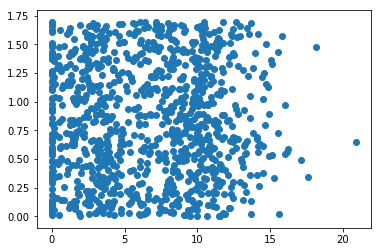

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2])
#ax1 = fig.add_subplot(122)
#ax1.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
plt.show()

In [43]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m,1))
    normDataSet = normDataSet / np.tile(ranges, (m,1)) # element wise divide
    return normDataSet, ranges, minVals

In [44]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [45]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [46]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [47]:
minVals

array([0.      , 0.      , 0.001156])

In [50]:
def datingClassTest():
    hoRatio = 0.10 # hold out 10%
    datingDataMat, datingLabels = file2matrix('C:/Users/SAMSUNG/Desktop/new/module3/datingTestSet.txt')
    # load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # min-max 표준화
    m = normMat.shape[0] # x_train의 행 갯수
    numTestVecs = int(m*hoRatio) # 데이터 obj의 10%를 테스트용으로 사용
    errorCount = 0.0
    for i in range(numTestVecs): # range(test사이즈)
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        # classify0(inX, dataSet, labels, k)
        # [numTestVecs:m, :] -> 10% 이후부터 끝까지
        # classity0의 inX에 test_x 대입!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        # dataSet에는 training_x / label에는 training_y
        print("the classifier came back with: {}, the real answer is: {}".format(classifierResult, datingLabels[i]))
        # test데이터를 training에 적용한 결과, 실제 test label값 출력
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is : {}".format(errorCount/float(numTestVecs))) # error / test횟수
    print("the error count : {}".format(errorCount))

In [51]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

-정규화 (newValue = (oldValue - min) / (max - min))

$$x' = \frac{x-min(x)}{max(x)-min(x)}$$

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module3

    -Part 03. 지도학습 기법 1
    
        02. Decision Tree

- 엔트로피란 p.541 ( p.542에 그래프 잘 참조하기 )


    - Info와 Gain 계산
    - entropy 특징 : log연산이라 조금 느리고, 좀 더 balanced tree를 생성

$ Entrophy(s) = \sum_{i=1}^c - p_i \, log_2(p_i) \; =>\; -x\,log_2 x \,-\, (1-x)\,log_2(1-x)$

$p_i : 범주 i에 속할 비율\;,\; c : 범주의 수 $

- Gini Impurity (지니) p.546

$ G_i = 1 - \sum_{k = 1}^n p(i,k)^2 $

    - p(i,k)는 그냥 범주별 확률
    - 지니임퓨리티는 확 나눠버리는 경우가 있음 (0이 나오는 경우가 있음, 큰 문제는 아님)
    - Gini 특징 : 좀 더 빠르고, 확 나눠버리는 특성이 있음

- Regularization Hyperparameters - p.548~
    - decision boundary의 overfigging, too large tree를 막기위해
    - DT의 leaf, depth 등을 제한해줘야 함
    - pruning
        - pre-pruning
        - post-pruning
        - mixed-pruning


    - fast, but overfitting
        - binary recursive partioning - entropy사용
        - CART(classification and regression trees) - Gini사용
    - non-biased, but 31 level restrict.

- unbiased recursive partioning based on permutation tests(p-test's sig)

In [2]:
from math import log

In [3]:
# 데이터 생성 p.550
def createDataSet():
    dataSet = [[1, 1, 'yes'],
              [1, 1, 'yes'],
              [1, 0, 'no'],
              [0, 1, 'no'],
              [0, 1, 'no']]
    labels = ['no surfacing', 'filippers']
    # change to disorete values (이산형 변수로 바꿔라)
    return dataSet, labels

# 엔트로피 구해보기
# Entropy함수 (적용되는 dataSet마다 before, left, right가 될 수 있음)
def calcShannonEnt(dataSet):
    numEntries = len(dataSet) # dataset의 행 갯수를 numEntries로 지정
    labelCounts = {}
    for featVec in dataSet: # the number of unique elements and their occurance
        currentLabel = featVec[-1] # y값 분리
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
        # 여기까지가 label의 갯수 사전 생성
    shannonEnt = 0.0
    for key in labelCounts: # labelCounts = {'yes' : 2, 'no' : 3}
        prob = float(labelCounts[key]) / numEntries # label별 비율
        shannonEnt -= prob * log(prob, 2) # log base 2
        # shannonEnt는 엔트로피 공식
    return shannonEnt

In [4]:
myDat, labels = createDataSet()
calcShannonEnt(myDat)

0.9709505944546686

In [5]:
# 모든 속성을 분리하기
# (자식노드로 분리할 변수 선택시 그 열을 제외한 데이터를 가져오는 함수)
def splitDataSet(dataSet, axis, value): # axis = n번재 행
    retDataSet = []
    for featVec in dataSet: # featVec은 하나의 행
        if featVec[axis] == value: # 각 행의 원소를 모두 돔 / value:는 class로써 classList순환
            reducedFeatVec = featVec[:axis] # chop out(노출하다) axis used for splitting
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet  # 각 행의 axis번째 데이터 빼고 리스트로 출력

In [6]:
splitDataSet(myDat, 0, 0)

[[1, 'no'], [1, 'no']]

In [7]:
splitDataSet(myDat, 0, 1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [8]:
splitDataSet(myDat, 1, 0)

[[1, 'no']]

In [9]:
splitDataSet(myDat, 1, 1)

[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]

In [10]:
# 데이터 분할 시 가장 좋은 속성 선택하기
# Info Gain이 최대로 되는 값 구하는 부분
# 방법 : 1. 각 열별 info gain을 구함 (각 class들의 엔트로피를 구해서 더한 후 baseEntophy에서 빼줌)
#       2. 열별 info gain을 비교해서 가장 큰 info gain을 나타내는 열을 반환한다.
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1 # the last column is used for the labels
    baseEntropy = calcShannonEnt(dataSet) # Entropy-before
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures): # iterate over all the features(마지막 열인 label 빼고)
        featList = [example[i] for example in dataSet]
        # create a list of all the examples of this feature
        uniqueVals = set(featList) # get a set of unique values
        #  set() 메소드는 자동으로 중복 데이터를 제거하고 unique한 값만 남긴다
        newEntropy = 0.0 # Entropy-after
# Entrophy-after를 구하는 함수 (P(class1), P(class2) 이들의 비율을 곱하므로)
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value) # 각 행의 axis번째 데이터 빼고 array로 출력
            # i번째 열에 value(해당 class)가 있는 행만 추출해서 만든 array
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
            # class별 비율을 곱하는 엔트로피 (P(class1), P(class2) -> Entrophy-before)
        infoGain = baseEntropy - newEntropy # calculate the info gain; ie reduction in entropy
        if (infoGain > bestInfoGain): # compare this to the best gain so far
            bestInfoGain = infoGain # if better than current best, set to best
            bestFeature = i
    return bestFeature # returns an integer
# ---------------------------여기까지가 첫번째 가지치기로 사용할 변수(열) 선택하는 과정----------------------------------

In [11]:
chooseBestFeatureToSplit(myDat)

0

In [12]:
# 재귀적으로 트리 만들기
# 열별 분류할 class 리스트의 갯수를 세는 함수 (ex) 남자, 여자면 2
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    # itemgetter(1)은 정렬 기준을 value로 하겠다는 뜻
    return sortedClassCount[0][0]
# 해당 열의 class들의 갯수를 세서 가장 높은 비율의 class의 갯수를 반환

In [13]:
# label이 아닌 분류 횟수(변수 갯수)를 정하는 과정
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet] # 행 단위임 / y를 추출하여 classList를 
    # for문을 통해 간단히 array의 요소 추출하기
    # 첫 번째 if는 변수(열) 값이 모두 같아서 분류 기준을 정할 수 없으면 멈춤
    if classList.count(classList[0]) == len(classList): # stop splitting when all of the classes are equal
        return classList[0]                             # 첫 번째 멈춤 조건, 모든 분류 항목이 같을 때 멈춤
    # 두 번째 if는 열이 1개만남았을 떄 가장 많은 class의 갯수를 반환
    if len(dataSet[0]) == 1:                            # stop splitting when there are no more features in dataSet
        return majorityCnt(classList)                   # 두 번째 멈춤 조건, 더 이상 분류할 속성이 없을 때 가장 많은 수를 반환
    # Info Gain이 최대로 되는
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    # 이 밑부터 재귀
    myTree = {bestFeatLabel : {}} # 유일한 값의 리스트를 구함
    del (labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet] # Info Gain이 가장 높은 열
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:] # copy all of labels, so trees don't mess up existing labels
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

In [14]:
# 분류기 테스트와 저장
def retrieveTree(i):
    listOfTrees = [{'no surfacing': {0: 'no', 1: {'filippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'filippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1:'no'}}}}]
    return listOfTrees[i]

def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree)[0] # inputTree.keys()[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
        # valueOfFeat이 dict인지 부울값으로 반환
        # True면 계속해서 가지따라 내려감
    else:
        classLabel = valueOfFeat
        # dict이 아니면 label값이 나옴 그럼 그 label값을 반환 (yes or no)
    return classLabel

In [17]:
myTree = createTree(myDat, labels)

In [18]:
myTree

{'no surfacing': {0: 'no', 1: {'filippers': {0: 'no', 1: 'yes'}}}}

In [18]:
classify(myTree, labels, [1,0])

'no'

In [19]:
classify(myTree, labels, [1,1])

'yes'

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module3

    -Part 03. 지도학습 기법 1
    
        03. Linear Regression

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76] 

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87] 



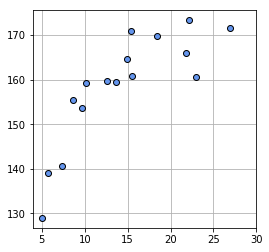

In [59]:
# 데이터 생성 --------------------------------------------------------------------
np.random.seed(seed = 1)
X_min = 4 # x의 하한(표시용)
X_max = 30 # x의 상한(표시용)
X_n = 16
X = 5 + 25*np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1]*np.exp(-Prm_c[2]*X) + 4*np.random.randn(X_n)
np.savez('ch5_data.npz', X = X, X_min = X_min, X_max = X_max, X_n = X_n, T = T)
print(np.round(X, 2),'\n')
print(np.round(T, 2), '\n')

# 데이터 그래프 -----------------------------------------------------------------
plt.figure(figsize = (4,4))
plt.plot(X, T, marker = 'o', linestyle = 'None',
        markeredgecolor = 'black', color = 'cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

- 평균제곱오차 (MSE)

$J = \frac{1}{N}\sum_{n=0}^{N-1} (y_n - t_n)^2$

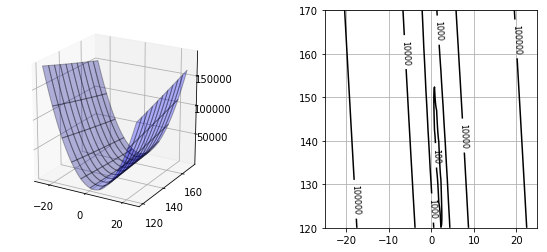

In [63]:
# p.559
# 평균오차함수-------------------------------------------------------
def mse_line(x, t, w):
    y = w[0]*x + w[1]
    mse = np.mean((y - t) ** 2)
    return mse

# 계산--------------------------------------------------------------
xn = 100
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
        
# 표시----------------------------------------------------------------
plt.figure(figsize = (9.5, 4))
plt.subplots_adjust(wspace = 0.5)

ax = plt.subplot(1, 2, 1, projection = '3d')
ax.plot_surface(xx0, xx1, J, rstride = 10, cstride = 10, alpha = 0.3,
               color = 'blue', edgecolor = 'black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors = 'black',
                  levels = [100, 1000, 10000, 100000])
cont.clabel(fmt = '%1.0f', fontsize = 8)
plt.grid(True)
plt.show()

    - 위에 표 해석
    (왼쪽그림) 보면 w0 방향의 변화에 J가 크게 변함
        기울기가 조금이라도 바뀌면 직선이 데이터 점에서 크게 어긋나기 때문
        그러나 3D 그래프는 w1 방향의 변화를 알기 어려움
    (오른쪽그림) w0 = 3, w1 = 135 근처에서 J가 최솟값을 취할 것 같음

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module3

    -Part 03. 지도학습 기법 1
    
        04. SVM

- soft margin
    - slack variable 최적화 문제
    
$$arg min(w^T w + C\sum_{i = 1}^n \xi_i)$$

    - slack의 크기를 조정해서 soft 또는 hard 하게 하려면 C 값을 조절한다
    - C가 클수록 slack에 대한 영향이 크므로 hard margin에 가까워지고, -> 완벽한 분류
    - C가 작을수록(0일수록) slack에 대한 영향이 작으므로 soft margin에 가까워짐 -> 오차허용

In [16]:
# 그래프 한글 출력 (나눔고딕) 설정하는법 p.580
print('버전: ', mpl.__version__)
print('설치 위치: ', mpl.__file__)
print('설정 위치: ', mpl.get_configdir())
print('캐시 위치: ', mpl.get_cachedir())

print('설정 파일 위치: ', mpl.matplotlib_fname())


font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')

# ttf 폰트 전체개수
print(len(font_list))

font_list[:15]
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
f[20:30]

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

path = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
fontprop = fm.FontProperties(fname = path, size = 10)

버전:  3.1.0
설치 위치:  C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\Affinity\.matplotlib
캐시 위치:  C:\Users\Affinity\.matplotlib
설정 파일 위치:  C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\mpl-data\matplotlibrc
1041
1041


Text(0, 0.5, '특성 1')

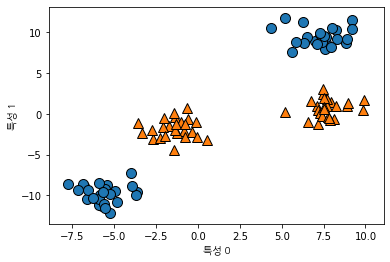

In [20]:
X, y = make_blobs(centers = 4, random_state = 8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0", fontproperties = fontprop)
plt.ylabel("특성 1", fontproperties = fontprop)

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


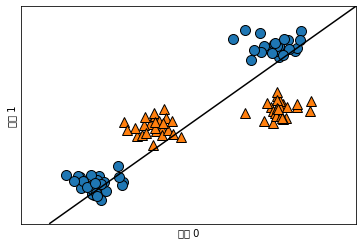

In [31]:
# p.581
# 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이런 데이터셋에는 잘 안맞음
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

##### 2차원 평면 분류 p.582~

Text(0.5, 0, '특성1 ** 2')

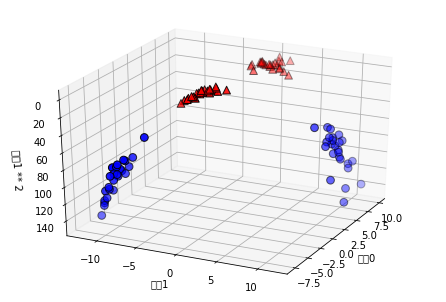

In [35]:
# p.582
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])
figure = plt.figure()

# 3차원 그래프
ax = Axes3D(figure, elev = -152, azim = -26)

# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b',
          cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r', marker = '^',
          cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

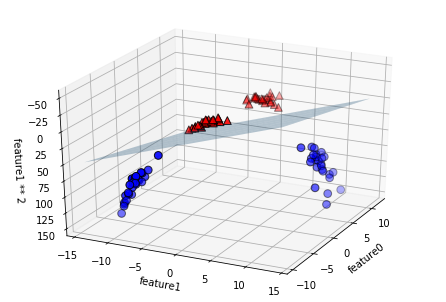

In [40]:
# p.583
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b',
           cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r', marker = '^',
           cmap = mglearn.cm2, s = 60, edgecolor = 'k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'feature 1')

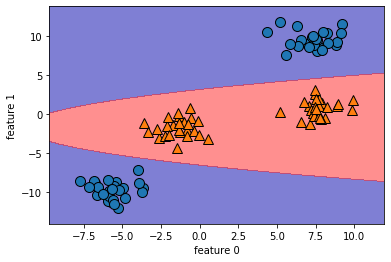

In [41]:
# 원래 특성으로 투영해보면 이 선형 SVM 모델은 더 이상 선형이 아님(직선보다 타원형에 가까움)
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels = [dec.min(), 0, dec.max()],
            cmap = mglearn.cm2, alpha = 0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

##### RBF 커널을 사용한 SVM으로 만든 결정 경계와 서포트 벡터

Text(0, 0.5, 'feature 1')

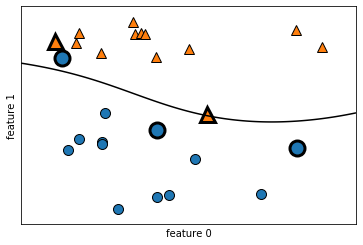

In [43]:
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps = .5)

# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 서포트 벡터
sv = svm.support_vectors_

# dual_coef_의 부호에 의해 서포트 벡터의 ㅋ르래스 레이블이 결정됨.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s = 15, markeredgewidth = 3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

##### 매개변수 튜닝 p.586

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


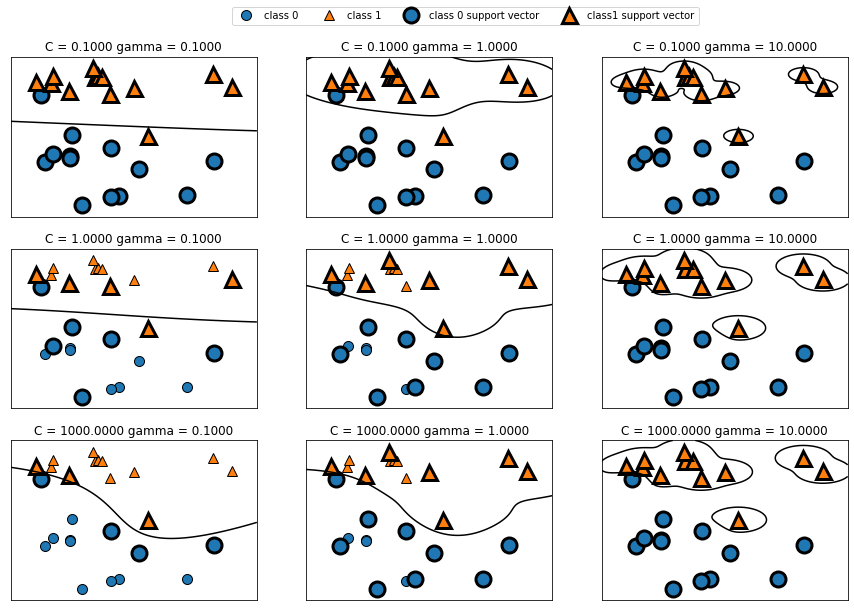

In [44]:
fig, axes = plt.subplots(3, 3, figsize = (15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = a)
        
axes[0, 0].legend(["class 0", "class 1", "class 0 support vector",
                  "class1 support vector"], ncol = 4, loc = (.9, 1.2))

위에 표 해석 p.587
    - 왼쪽에서 오른쪽으로 가면서 gamma 매개변수를 0.1에서 10으로 증가
    - 작은 gamma 값은 가우시안 커널의 반경을 크게 하여 많은 포인트들이 가까이 있는 것으로 고려
    - 따라서, 왼쪽 그림의 결정 경계는 매우 부드럽고 오른쪽으로 갈수록 결정 경계는 하나의 포인트에 더 민감
    - 작은 gamma 값이 결정 경계를 천천히 바뀌게 하므로 모델의 복잡도를 낮춤
    - 반면에 큰 gamma 값은 더 복잡한 모델을 만듦.

##### 과대적합 문제해결

In [46]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state = 0)
svc = SVC()
svc.fit(X_train, y_train)
print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
plt.boxplot(X_train, manage_xticks = False)
plt.yscale("symlog")
plt.xlabel("feature list")
plt.ylabel("feature scale")

TypeError: boxplot() got an unexpected keyword argument 'manage_xticks'

데이터 전처리
    - 문제를 해결하는 방법 하나는 특성 값의 범위가 비슷해지도록 조정
    - 커널 SVM에서는 모든 특성 값을 평균이 0이고 단위 분산이 되도록 하거나, 0과 1사이로 맞추는 방법을 많이 사용

In [48]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis = 0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis = 0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1입니다.
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis = 0))
print("특성별 최댓값\n", X_train_scaled.max(axis = 0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [49]:
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


##### SVM 이해하기 - 장단점과 매개변수 설명 p.590